# Renewable Energy
Data source: https://www.energy.gov.au/publications/australian-energy-update-2023
- Machine readable files: https://www.energy.gov.au/publications/australian-energy-statistics-2023-machine-readable-files

## Calendar Year Data

<Axes: xlabel='Year', ylabel='Quantity'>

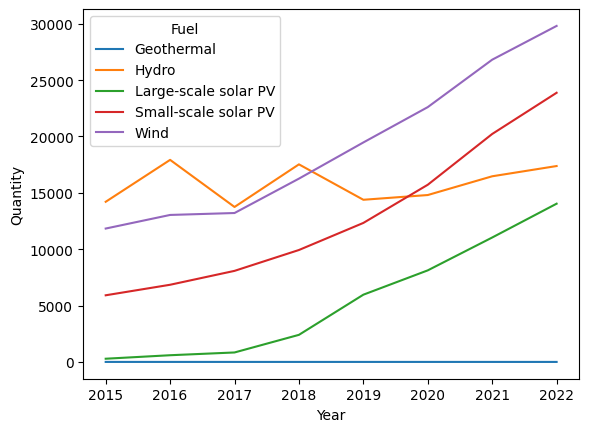

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
df = pd.read_csv('~/PycharmProjects/ZZSC9020-Group-M/data/renewable_energy/Australian Energy Statistics 2023 Table O CY - machine-readable.csv')
df = df[df['Jurisdiction'] == 'AUS']
df = df[df['Fuel'].isin(['Geothermal', 'Hydro', 'Large-scale solar PV', 'Small-scale solar PV', 'Wind'])]
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
# df['Year'] = df['Year'].apply(lambda x: int(x[:4]))
sns.lineplot(data=df, x='Year', y='Quantity', hue='Fuel')

## Financial Year Data

In [2]:
df = pd.read_csv('~/PycharmProjects/ZZSC9020-Group-M/data/renewable_energy/Australian Energy Statistics 2023 Table O FY - machine-readable.csv')
df

,Jurisdiction,Year,Fuel,Unit,Quantity
0,AUS,1989-90,"Bagasse, wood",GWh,750
1,AUS,1989-90,Biogas,GWh,NaN
2,AUS,1989-90,Black coal,GWh,87573
3,AUS,1989-90,Brown coal,GWh,33594
4,AUS,1989-90,Geothermal,GWh,NaN
...,...,...,...,...,...
1960,WA,2021-22,Small-scale solar PV,GWh,2763.104
1961,WA,2021-22,Total,GWh,44549.284
1962,WA,2021-22,Total non-renewable,GWh,37168.239
1963,WA,2021-22,Total renewable,GWh,7381.045


In [3]:
df = df[df['Jurisdiction'] == 'AUS']
df = df[df['Fuel'].isin(['Geothermal', 'Hydro', 'Large-scale solar PV', 'Small-scale solar PV', 'Wind'])]
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Year'] = df['Year'].apply(lambda x: int(x[:4]) + 1)
df['quarter'] = df['Year'].apply(lambda x: datetime(x, 1, 1))
df

,Jurisdiction,Year,Fuel,Unit,Quantity,quarter
4,AUS,1990,Geothermal,GWh,NaN,1990-01-01
5,AUS,1990,Hydro,GWh,14880.000,1990-01-01
6,AUS,1990,Large-scale solar PV,GWh,NaN,1990-01-01
10,AUS,1990,Small-scale solar PV,GWh,NaN,1990-01-01
14,AUS,1990,Wind,GWh,NaN,1990-01-01
...,...,...,...,...,...,...
484,AUS,2022,Geothermal,GWh,NaN,2022-01-01
485,AUS,2022,Hydro,GWh,17010.891,2022-01-01
486,AUS,2022,Large-scale solar PV,GWh,12569.176,2022-01-01
490,AUS,2022,Small-scale solar PV,GWh,22117.450,2022-01-01


<Axes: xlabel='Year', ylabel='Quantity'>

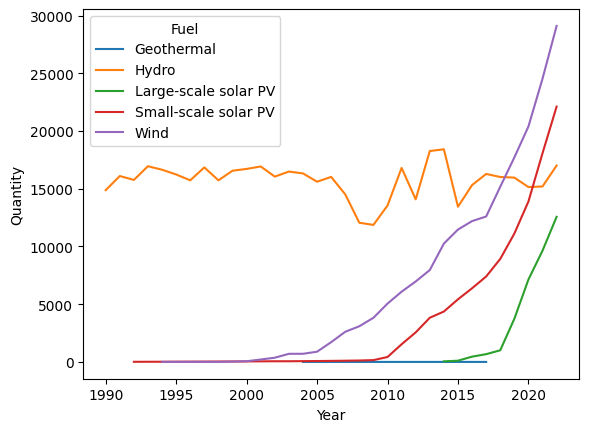

In [4]:
sns.lineplot(data=df, x='Year', y='Quantity', hue='Fuel')

In [5]:
df_quarter = pd.DataFrame({'quarter': [datetime(2010, 1, 1) + relativedelta(months=n) for n in range(0, 147, 3)]})
df_quarter

,quarter
0,2010-01-01
1,2010-04-01
2,2010-07-01
3,2010-10-01
4,2011-01-01
5,2011-04-01
6,2011-07-01
7,2011-10-01
8,2012-01-01
9,2012-04-01


In [6]:
df_re = df.pivot(index='Year', columns='Fuel', values='Quantity').reset_index()
df_re['quarter'] = df_re['Year'].apply(lambda x: datetime(x, 1, 1))
df_re = df_re.drop(['Year', 'Geothermal'], axis=1)
df_re

Fuel,Hydro,Large-scale solar PV,Small-scale solar PV,Wind,quarter
0,14880.000,NaN,NaN,NaN,1990-01-01
1,16103.000,NaN,NaN,NaN,1991-01-01
2,15768.000,NaN,10.900,NaN,1992-01-01
3,16953.000,NaN,13.300,NaN,1993-01-01
4,16649.000,NaN,15.900,4.000,1994-01-01
5,16239.000,NaN,18.900,7.000,1995-01-01
6,15731.000,NaN,23.400,7.000,1996-01-01
7,16852.000,NaN,27.800,7.000,1997-01-01
8,15733.000,NaN,33.500,8.000,1998-01-01
9,16563.000,NaN,37.700,28.000,1999-01-01


# Transformed data
We don't have quarterly information for renewable energy. So I've interpolated the values.

In [7]:
df_req = pd.merge(df_quarter, df_re, how='left', on='quarter')
df_req = df_req.interpolate(method='linear', limit_direction='forward')
df_req['total_renewable'] = df_req.sum(axis=1, numeric_only=True)
df_req.to_csv('../data/transformed/renewable_energy.csv', index=False)
df_req

,quarter,Hydro,Large-scale solar PV,Small-scale solar PV,Wind,total_renewable
0,2010-01-01,13548.70000,NaN,424.90000,5051.70000,19025.30000
1,2010-04-01,14363.20000,NaN,701.27500,5310.00000,20374.47500
2,2010-07-01,15177.70000,NaN,977.65000,5568.30000,21723.65000
3,2010-10-01,15992.20000,NaN,1254.02500,5826.60000,23072.82500
4,2011-01-01,16806.70000,NaN,1530.40000,6084.90000,24422.00000
5,2011-04-01,16125.85000,NaN,1787.47500,6306.10000,24219.42500
6,2011-07-01,15445.00000,NaN,2044.55000,6527.30000,24016.85000
7,2011-10-01,14764.15000,NaN,2301.62500,6748.50000,23814.27500
8,2012-01-01,14083.30000,NaN,2558.70000,6969.70000,23611.70000
9,2012-04-01,15129.87500,NaN,2875.60000,7217.17500,25222.65000


<Axes: xlabel='quarter', ylabel='quantity'>

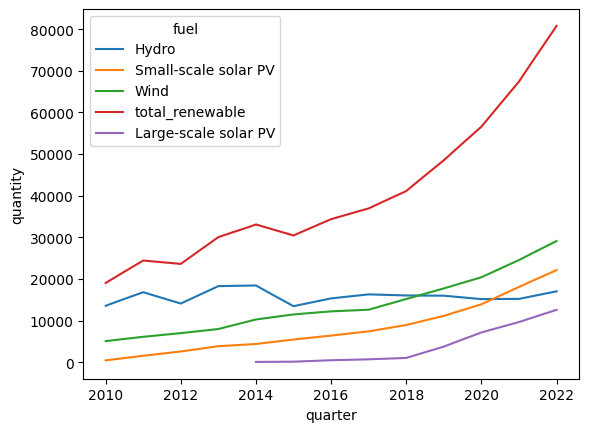

In [8]:
df_long = df_req.set_index('quarter').stack().reset_index()
df_long.columns = ['quarter', 'fuel', 'quantity']
df_long
sns.lineplot(data=df_long, x='quarter', y='quantity', hue='fuel')